In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import yfinance as yf

ticker = yf.Ticker("NVDA")
current_price = ticker.history(period="1d")["Close"].iloc[-1]

yfinance.Ticker object <NVDA>

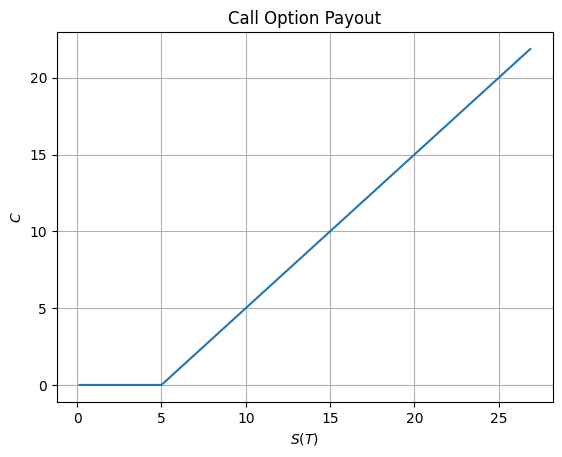

In [21]:
import yfinance as yf
from payout import compute_call_option_payout

ticker = yf.Ticker("NVDA")
current_price = ticker.history(period="1d")["Close"].iloc[-1]

# Use a range around the current price
S = np.linspace(current_price * 0.001, current_price * .2, 100)

# Use a real strike from the options chain
expiration = ticker.options[0]
option_chain = ticker.option_chain(expiration)

# First available strike
E = option_chain.calls["strike"].iloc[0]  
C = compute_call_option_payout(S, E)

plt.figure()
plt.plot(S, C)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$C$')
plt.title('Call Option Payout')
plt.grid()

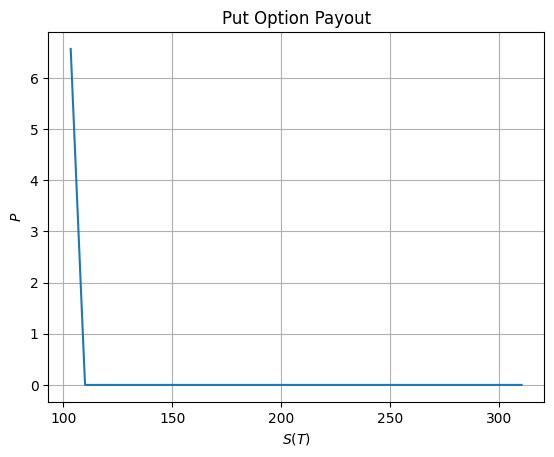

In [14]:
from payout import compute_put_option_payout

# Choose a ticker symbol
ticker = yf.Ticker("AAPL")

# Get the latest closing price
current_price = ticker.history(period="1d")["Close"].iloc[-1]

# Get the first available expiration date
expiration = ticker.options[0]

# Get the option chain for that expiration
option_chain = ticker.option_chain(expiration)

# Choose a real strike price from the puts
E = option_chain.puts["strike"].iloc[0]

# Create a range of possible underlying prices
S = np.linspace(current_price * 0.5, current_price * 1.5, 1000)

# Compute the put option payout
P = compute_put_option_payout(S, E)

plt.figure()
plt.plot(S, P)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$P$')
plt.title('Put Option Payout')
plt.grid()

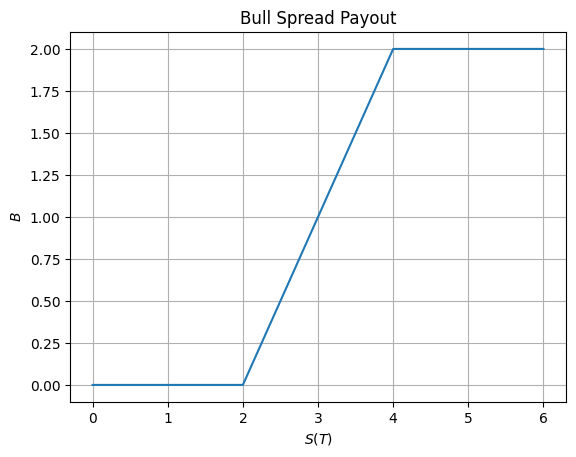

In [6]:
from payout import compute_bull_spread_payout

S = np.linspace(0, 6, 100)
E1 = 2
E2 = 4
B = compute_bull_spread_payout(S, E1, E2)

plt.figure()
plt.plot(S, B)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$B$')
plt.title('Bull Spread Payout')
plt.grid()

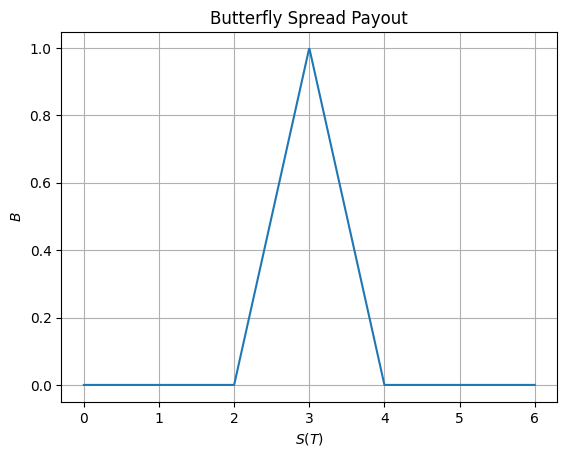

In [7]:
from payout import compute_butterfly_spread_payout

S = np.linspace(0, 6, 1000)
E1 = 2
E2 = 3
E3 = 4

B = compute_butterfly_spread_payout(S, E1, E2, E3)

plt.figure()
plt.plot(S, B)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$B$')
plt.title('Butterfly Spread Payout')
plt.grid()